In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unidecode
import re
from spacy.cli import download
import spacy
import nltk
import contractions

spacy.cli.download("en_core_web_sm")
nltk.download('stopwords')

from nltk.corpus import stopwords

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.6 MB/s  0:00:00eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /home/tguyot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

# Clean up Unnamed columns and change column names for clarity
df = df.assign(
    is_spam=lambda x: 0
)
df.loc[df.v1 == 'ham', 'is_spam'] = 1
df = df[['is_spam', 'v2']]
df.columns = ['is_spam', 'sms']


Text(0.5, 1.0, 'Proportion of spam and non-spam')

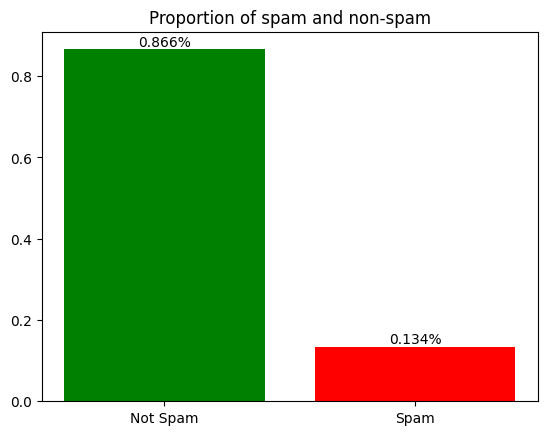

In [3]:
# Small EDA
fig, ax = plt.subplots()

container = ax.bar(['Not Spam', 'Spam'], df.is_spam.value_counts(normalize=True).values, color=['green', 'red'])
ax.bar_label(container, fmt='{:.3f}%')
ax.set_title('Proportion of spam and non-spam')


In [23]:
df_eda = df.copy()
df_eda['length'] = df_eda.sms.str.len()

spams = df_eda.loc[df_eda['is_spam'] == 0]
hams = df_eda.loc[df_eda['is_spam'] == 1]

Text(0.5, 1.0, 'Distribution of spam and non-spam per length')

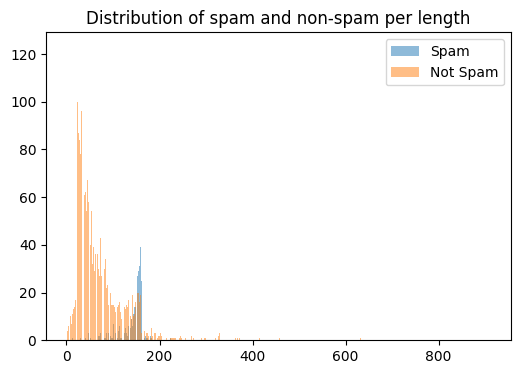

In [25]:
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(spams.length.value_counts().index, spams.length.value_counts().values, alpha=0.5 , label='Spam')
ax.bar(hams.length.value_counts().index, hams.length.value_counts().values, alpha=0.5, label='Not Spam')
ax.legend()
ax.set_title('Distribution of spam and non-spam per length')